Populating the interactive namespace from numpy and matplotlib
1.10.4
2.1.0
0.20.3
0.8.0
          PL Intensity (kCts/s)
Time (s)                       
0.01                       36.9
0.02                       34.9
0.03                       36.9
0.04                       37.5
0.05                       35.8


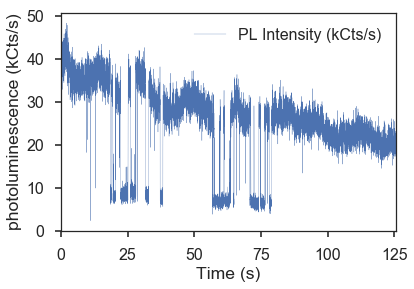

today: 2018-07-02


'O:\\User\\Viva\\analysis\\blinker_analysis\\taken-2018-05-25'

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 27 17:17:43 2018

Blinker analysis

@author: Viva Horowitz
"""

import numpy as np
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # default params
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns
import numpy as np
sns.set(style='ticks')
sns.set_context('poster')
from __future__ import division # division should return float

%pylab inline

print(np.__version__)
print(mpl.__version__)
print(pd.__version__)
print(sns.__version__)

# ** set for each dataset
datadate = '2018-05-25'
datafolder = r'O:\User\Viva\data\2018-05-25_blinking-statistics'
filename = 'GoodBlinker_5-25-2018.txt'
analysisfolder = r'O:\User\Viva\analysis\blinker_analysis'

os.chdir(datafolder)

tname = 'Time (s)'
PLname = 'PL Intensity (kCts/s)'
data = pd.read_csv(filename,
                   skiprows=1,
                   header=None,
                   sep='\t',
                   names=['Time (s)','PL Intensity (kCts/s)'],
                   usecols=[0,1])
data = data.set_index(tname)
print(data.head())
rebincount = 0

data.plot(linewidth=0.3)
plt.ylabel('photoluminescence (kCts/s)')
plt.show()

filename = filename.replace('\\','-')
origfilename = filename
os.chdir(analysisfolder)
today = datetime.date.isoformat(datetime.date.today())
if not os.path.exists('taken-' + datadate):
    os.makedirs('taken-' + datadate)
os.chdir('taken-' + datadate)

print('today: '+today)
os.getcwd()

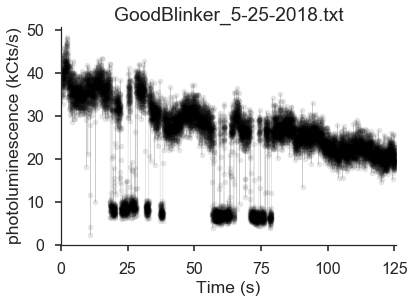

Collection rate: 100.0 Hz
Time bin size: 0.01 sec


In [2]:
fig1,axPL = plt.subplots()
#axPL.plot(data, 'k')
#axPL.legend.remove()
data.plot(marker='.',linestyle='None',legend=False, ax=axPL, color='k',  alpha=.1)
data.plot(legend=False, linewidth=0.5, alpha=0.2, ax=axPL, color='k')
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)

plt.title(filename)

sns.despine()
plt.savefig(today + ',' + filename+',blinking.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+',blinking.png', bbox_inches='tight', dpi=200)

plt.show()

def arangebylength(start, step, length):
    return np.arange(start = start, stop=start+step*(length-.5), step = step )

# rebin: combine two rows into one.
def rebindata(data, colname=PLname, indexname = tname):
    first = 1 # this is a value that indicates if we're on the first (=1) or the second (-1) of a pair of two bins
    rebinvals = []

    for value in data[colname]:
        if first == 1:
            prevval = value
        else:
            # calculate average of the two bins
            combined = (prevval + value) /2.0 
            rebinvals.append(combined)
            del prevval
        first = -1 * first
        
    timesetting = data.index[1]-data.index[0]
    rebintimes = arangebylength(start =0, step = timesetting*2, length = len(rebinvals) )
    rebinneddata = pd.DataFrame(data = rebinvals, index = rebintimes, columns =[colname])
    rebinneddata.index.name=indexname
    return rebinneddata

# The data was collected at a particular rate
timesetting = data.index[1]-data.index[0]
fps = 1/timesetting
print('Collection rate: ' + str(fps) + ' Hz')
print('Time bin size: ' + str(timesetting) + ' sec')

Effective collection rate: 100.0 Hz
Time bin size: 0.01 sec


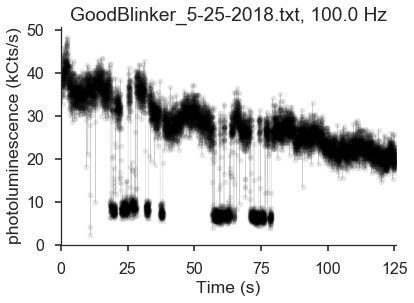

In [3]:
# *** run this an appropriate number of times, can skip if not rebinning

n = 0 # number of times to rebin.

for i in range(n):
    data = rebindata(data)
    rebincount = rebincount + 1
    print(rebincount)

timesetting = data.index[1]-data.index[0]
fps = 1/timesetting
print('Effective collection rate: ' + str(fps) + ' Hz')
print('Time bin size: ' + str(timesetting) + ' sec')
filename = origfilename + ', ' + str(fps) + ' Hz'


fig1,axPL = plt.subplots()
#axPL.plot(data, 'k')
#axPL.legend.remove()
data.plot(marker='.',linestyle='None',legend=False, ax=axPL, color='k',  alpha=.1)
data.plot(legend=False, linewidth=0.5, alpha=0.2, ax=axPL, color='k')
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)

plt.title(filename)

sns.despine()
#plt.savefig(today + ',' + filename+',blinking.pdf', bbox_inches='tight')
#plt.savefig(today + ',' + filename+',blinking.png', bbox_inches='tight', dpi=200)

plt.show()

93 bins


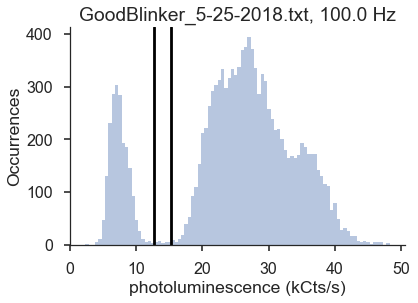

In [4]:
binsequence = np.arange(data.min(), data.max(), fps/200)# ** adjust bins as needed. Higher denominator: more bins
print (str(len(binsequence)) + ' bins')

#data.hist(bins= binsequence)
sns.distplot(data, bins=binsequence, kde=False, rug=False, kde_kws={'bw':.5, 'label':'KDE'}, norm_hist=False); # must norm if KDE
plt.xlabel('photoluminescence (kCts/s)')
#plt.locator_params(axis='x', nbins=10)
ax = plt.gca()

# ** Need to pick an appropriate threshold between on and off for each dataset
uthreshold = 15.2
lthreshold = uthreshold-2.5

ax.axvline(x=uthreshold, color='k')
ax.axvline(x=lthreshold, color = 'k')
#ax.tick_params(axis='x',which='minor',bottom='on')
#ax.xaxis.set_minor_locator(minorLocator)

plt.title(filename)
plt.ylabel('Occurrences')
sns.despine()

#plt.savefig(today + ',' + filename+',PLhistogram.pdf', bbox_inches='tight')
#plt.savefig(today + ',' + filename+',PLhistogram.png', bbox_inches='tight', dpi=200)

plt.show()

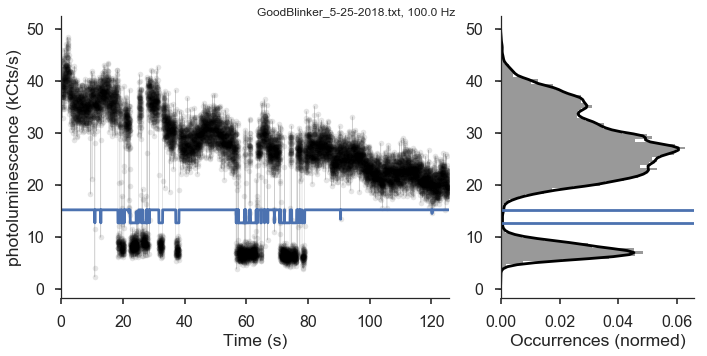

In [5]:
# With an uthreshold and an lthreshold
# This code has an in between status where it won't be counted as remaining in the state 
# but it won't be counted in the other state, either. 
# This seems like the most straightforward way to deal with (rare) cases in between.
# Other options are shown.


threshdata = data[PLname].clip(upper=uthreshold, lower=lthreshold)


fig2,[axPL,axhist] = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True, gridspec_kw = {'width_ratios':[4,2]})
data.plot(marker='.',linestyle='None',legend=False, alpha=0.1, ax=axPL, color='k')
data.plot(legend=False, linewidth=0.5, alpha=0.2, ax=axPL, color='k')
threshdata.plot(legend=False, ax=axPL)
axPL.set_ylabel('photoluminescence (kCts/s)')
axPL.set_xlabel(tname)
plt.suptitle(filename)
sns.despine()
plt.tight_layout() 

sns.distplot(data, bins=binsequence, kde=True, rug=False, ax=axhist, vertical=True, color='k',
             kde_kws={'bw':.5});
#             kde_kws={'bw':.5, 'label':'Kernal density\nestimate (KDE)'});
#axhist.set_xlabel('photoluminescence (kCts/s)')
axhist.set_xlabel('Occurrences (normed)')
axhist.axhline(y=uthreshold)
axhist.axhline(y=lthreshold)

plt.savefig(today + ',' + filename+',blinkingandthreshold.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+',blinkingandthreshold.png', bbox_inches='tight', dpi=200)

plt.show();

In [6]:
# Main method: in between status where it won't be counted as remaining in the state 
# but it won't be counted in the other state, either.
downtimes2= threshdata[threshdata != uthreshold].index
uptimes2=threshdata[threshdata != lthreshold].index

#print(uptimes2)
#print(downtimes2)

# Alternate option (not used)
uptimes= threshdata[threshdata == uthreshold].index
downtimes=threshdata[threshdata == lthreshold].index

#print(uptimes)
#print(downtimes)

# We can compare the two ways of interpreting blinks.
# There is a discrepancy at about 22 seconds between the two interpretations. 
# It's a matter of whether we consider it stayed off or 
# if we consider that it came up enough to have ended the off blink and began another.
# I tend to think it ended one and began another in this case, so I'm going to use uptimesep2 as my off duration.

# subtracting each time from the last time we had the same state gives the amount of time it was not in that state.
# Therefore the separation between up times is in fact the duration of time off.
uptimesep = uptimes[1:] - uptimes[:-1]
uptimesep2 = uptimes2[1:] - uptimes2[:-1]

"""
plt.plot(uptimes[:-1],uptimesep, '.-')
plt.plot(uptimes2[:-1],uptimesep2, '-')
plt.ylim(ymin=3*timesetting)
#plt.axis('equal')
plt.xlabel(tname)
plt.ylabel('duration of blink off (s)')
plt.figure()
data.plot()
plt.show()
"""

# We can compare the two ways of interpreting blinks. It looks like they mostly agree.

downtimesep = downtimes[1:] - downtimes[:-1]
downtimesep2 = downtimes2[1:] - downtimes2[:-1]

"""
plt.plot(downtimes[:-1],downtimesep,'.-')
plt.plot(downtimes2[:-1],downtimesep2,'-')
plt.ylim(ymin=3*timesetting)
#plt.axis('equal')
plt.xlabel(tname)
plt.ylabel('duration of blink on (s)')
#plt.figure()
data.plot()
plt.show()
"""

# I chose to use downtimesep2 and uptimesep2, as detailed above.

ontimes = filter(lambda a: a > 1.5*timesetting, downtimesep2)
offtimes = filter(lambda a: a > 1.5*timesetting, uptimesep2)

# save analyzed data: bright state duration
ontimesdf = pd.DataFrame(ontimes, columns=["Bright state duration (s)"])
ontimesdf.to_csv(filename+' uptimes.csv', index=False, header=True)
print('Uptimes saved to: ')
print(os.path.join(os.getcwd(), filename+ ' uptimes.csv'))
# save analyzed data: dim state duration
offtimesdf = pd.DataFrame(offtimes, columns=["Dim state duration (s)"])
offtimesdf.to_csv(filename+' downtimes.csv', index=False, header=True)
print('Downtimes saved to: ')
print(os.path.join(os.getcwd(), filename+ ' downtimes.csv'))
## to open: 
# ontimesdf = pd.read_csv(filename+' ontimes.csv'
# offtimesdf = pd.read_csv(filename+' downtimes.csv')
#  # convert to list or else the rest of the code won't work.
# ontimes = list(ontimesdf['Bright state duration (s)'])
# offtimes = list(offtimesdf["Dim state duration (s)"])

## https://stackoverflow.com/questions/32765333/how-do-i-replicate-this-matlab-function-in-numpy/32765547#32765547
def histc(X, bins):
    map_to_bins = np.digitize(X,bins)
    r = np.zeros(bins.shape)
    for i in map_to_bins:
        r[i-1] += 1
    return [r, map_to_bins]

def CDF(S):
    M = len(S); # size of array = number of elements
    sorteddata = sort(S); # ascending sort is CDF, descending sort is 1-CDF
    cum_prob = [elem/M for elem in range(M)] # probability integrated from 0 to sorteddata.
    cum_prob2 = [1-p for p in cum_prob] # probability integrated from sorteddata to inf
    return sorteddata,cum_prob2

def nonlinearhistc(X,bins, thresh=3, verbose = True):
    map_to_bins = np.digitize(X,bins)
    r = np.zeros(bins.shape)
    for i in map_to_bins:
        r[i-1] += 1
    if verbose:
        print r 
        #print bins
    ## normalize by bin width
    probability = np.zeros(bins.shape)
    area = 0;
    thinbincount = 0
    for i in range(len(bins)-1):
        if r[i]<=1:
            thinbincount += 1;
        thisbinwidth = bins[i+1] - bins[i]
        probability[i] = r[i]/thisbinwidth
        area += probability[i]*thisbinwidth;
        
    if thinbincount > thresh:
        print("Warning: too many bins for data, thinbincount=" + str(thinbincount))
    elif verbose:
        print("thinbincount=" + str(thinbincount))
    ## normalize area.
    normedprobability = [eachprobability / area for eachprobability in probability]
    return normedprobability, map_to_bins

Uptimes saved to: 
O:\User\Viva\analysis\blinker_analysis\taken-2018-05-25\GoodBlinker_5-25-2018.txt, 100.0 Hz uptimes.csv
Downtimes saved to: 
O:\User\Viva\analysis\blinker_analysis\taken-2018-05-25\GoodBlinker_5-25-2018.txt, 100.0 Hz downtimes.csv


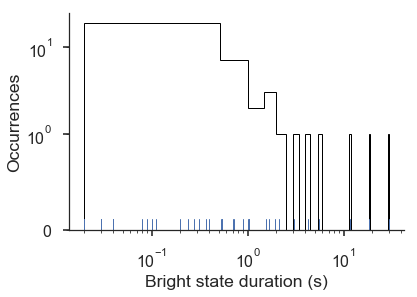

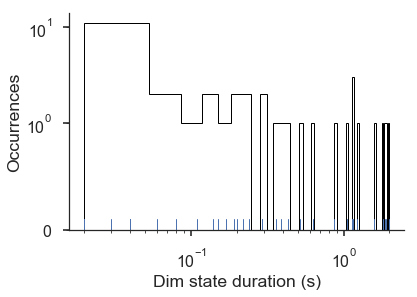

In [7]:
# ** Choose a nice number of bins to see how the data look.
# It's better to have as many bins as possible before the first empty bin.

numonbins = 60
numoffbins = 60

#plt.hist(ontimes, bins=numonbins, histtype='step', linewidth=1)
sns.distplot(ontimes, bins=numonbins, kde=False, rug=True, 
             hist_kws={"histtype": "step", "linewidth": 1, "alpha": 1, "color": "k"});
plt.xlabel('Bright state duration (s)')
plt.ylabel('Occurrences')
ax = plt.gca()
ax.set_yscale('symlog', linthreshy=1)
ax.set_xscale('log')
sns.despine()
plt.show()
#plt.hist(offtimes, bins=numoffbins, histtype='step', linewidth=1)
sns.distplot(offtimes, bins=numoffbins, kde=False, rug=True, 
             hist_kws={"histtype": "step", "linewidth": 1, "alpha": 1, "color": "k"});
plt.xlabel('Dim state duration (s)')
plt.ylabel('Occurrences')
ax = plt.gca()
ax.set_yscale('symlog', linthreshy=1)
ax.set_xscale('log')
sns.despine()
plt.show()

[ 9.  3.  2.  5.  9.  4.  3.  1.  2.  0.]
thinbincount=1
[ 8.  3.  2.  3.  5.  4.  3.  5.  6.  0.]
thinbincount=0


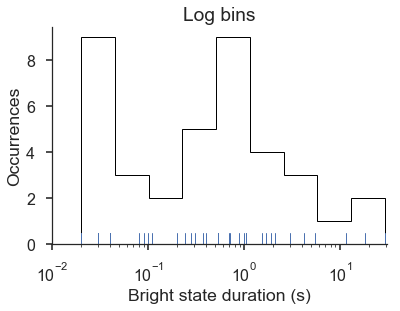

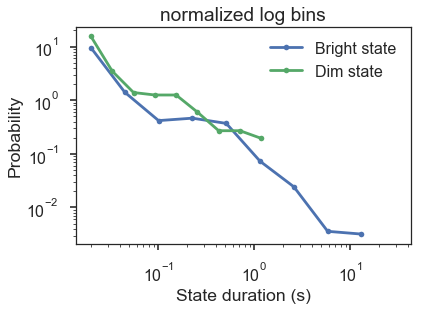

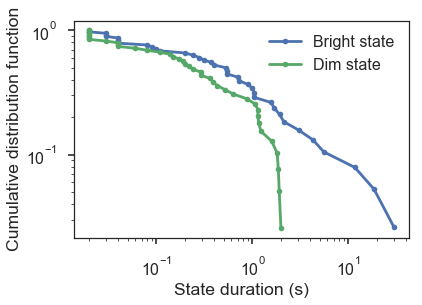

In [8]:
# logarithmic bins.

## ** choose number of bins
numonbins_log = 10
numoffbins_log = 10

small = 1e-4
onbins=np.logspace(np.log10(min(ontimes)-small),np.log10(max(ontimes)+small), numonbins_log)
offbins = np.logspace(np.log10(min(offtimes)-small),np.log10(max(offtimes)+small), numoffbins_log)

onfitx = np.logspace(np.log10(min(ontimes)),np.log10(max(ontimes)), numonbins_log*10)
offfitx = np.logspace(np.log10(min(offtimes)),np.log10(max(offtimes)), numoffbins_log*10)

#plt.hist(ontimes, bins=numonbins, histtype='step', linewidth=1)
sns.distplot(ontimes, bins=onbins, kde=False, rug=True, 
             hist_kws={"histtype": "step", "linewidth": 1, "alpha": 1, "color": "k"});
plt.xlabel('Bright state duration (s)')
plt.ylabel('Occurrences')
ax = plt.gca()
xlim(xmin=1e-2)
#ax.set_yscale('symlog', linthreshy=1)
ax.set_xscale('log')
sns.despine()
title('Log bins' )

onprobs, _ = nonlinearhistc(ontimes, onbins) 
offprobs, _ = nonlinearhistc(offtimes, offbins)     
    
plt.figure()
plot(onbins,onprobs, '.-', label="Bright state");
plot(offbins,offprobs, '.-', label="Dim state");

gca().set_yscale('log')
gca().set_xscale('log')
title('normalized log bins')
plt.xlabel('State duration (s)')
plt.ylabel('Probability');
legend();

figure()
sortedontimes,CDFontimes=CDF(ontimes)
sortedofftimes,CDFofftimes=CDF(offtimes)
loglog(sortedontimes,CDFontimes, '.-', label='Bright state');
loglog(sortedofftimes,CDFofftimes, '.-', label='Dim state');
xlabel('State duration (s)');
ylabel('Cumulative distribution function');
legend();

In [9]:
from scipy.optimize import curve_fit
import scipy
print(scipy.__version__)
# need at least version 14.0 of scipy.

def expfit(t, A, tau):
    return (A * np.exp(t/(-tau)))

def powlaw(t, C, m):
    return C * t**(-m)

def CDFpowlaw(t,C,m):
    return (C/(m-1)) * t**(-(m-1)) # https://arxiv.org/pdf/cond-mat/0412004.pdf

# Trying to find good guess
#onparamexp[1]=-.8
#onfitexp = 30 * np.exp(centeredonbins/(onparamexp[1]))

0.17.1


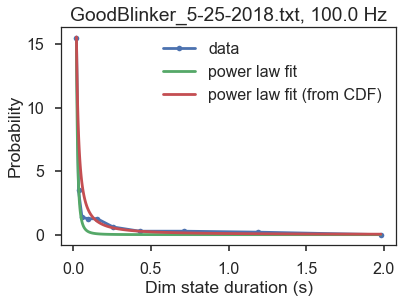

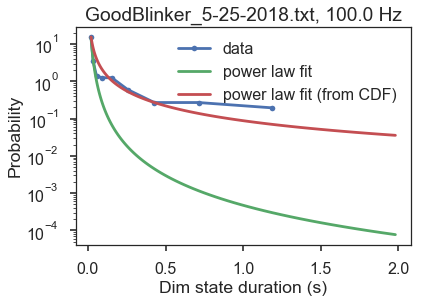

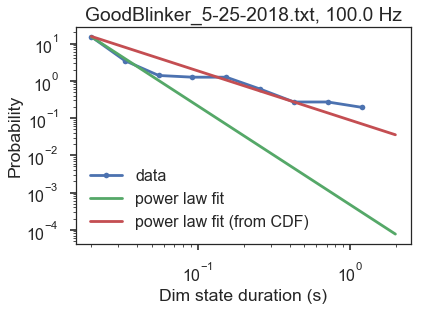

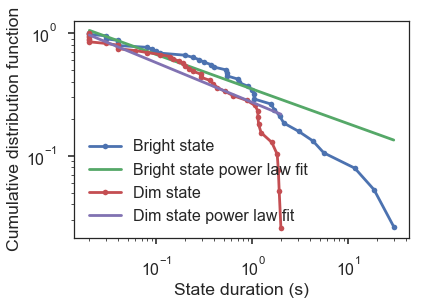

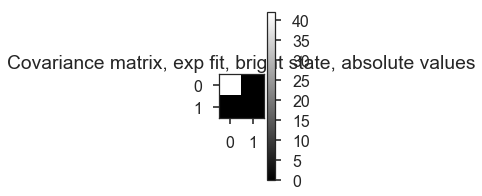

It's ok to use the uncertainties below as long as there aren't strong on-diagonal values.


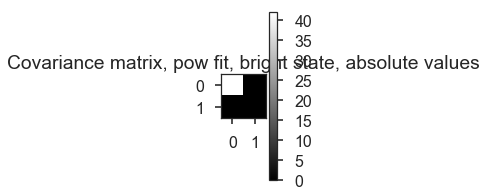

It's ok to use the uncertainties below as long as there aren't strong on-diagonal values.
Exponential fit:
on Coefficient A_bright = 43.2624449175 ± 6.48055438454
time constant tau_bright = 0.0131303198989 ± 0.00124328987187 sec
Power law:
on Coefficient C_bright = 0.00129556030877 ± 0.000845790015739
logarithmic slope m_bright = 2.27207987345 ± 0.167447996696
Power law (from CDF):
on Coefficient C_bright = 0.0981059152136 ± 0.00239658968057
logarithmic slope m_bright = 1.28188406993 ± 0.0144009557272


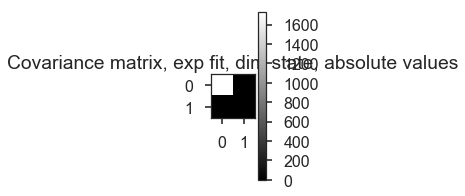

It's ok to use the uncertainties below as long as there aren't strong off-diagonal values.


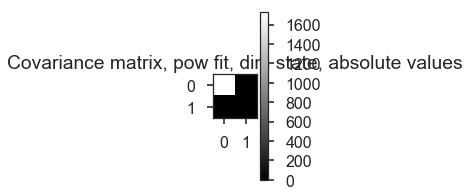

It's ok to use the uncertainties below as long as there aren't strong off-diagonal values.
Exponential fit:
off Coefficient A_dim = 128.149292338 ± 41.5486561768
time constant tau_dim = 0.00939423437078 ± 0.00136924540594 sec
Power law:
off Coefficient C_dim = 0.000469026176813 ± 0.000519278146914
logarithmic slope m_dim = 2.65442276851 ± 0.285071173553
Power law (from CDF):
off Coefficient C_dim = 0.087727201815 ± 0.00200849859241
logarithmic slope m_dim = 1.32348887129 ± 0.0187018285419


In [19]:
showexpfit = False
showpowfit = True

### ==== FITS ====

# on time exponential fit, not truncated
onparamexp, onpcovexp = curve_fit(expfit, onbins, onprobs,p0 = (30, 2))
onfitexp = expfit(onfitx,onparamexp[0],onparamexp[1])

# on time power law fit, not truncated
onparampow, onpcovpow = curve_fit(powlaw, onbins, onprobs,p0 = (2, 1))
onfitpow = powlaw(onfitx,onparampow[0],onparampow[1])

# on time power law fit to CDF
onparampow_fromCDF, onpcovpow_fromCDF = curve_fit(CDFpowlaw, sortedontimes,CDFontimes,p0 = onparampow)
onfitpow_fromCDF = powlaw(onfitx,onparampow_fromCDF[0],onparampow_fromCDF[1])
onfitpowCDF = CDFpowlaw(onfitx,onparampow_fromCDF[0],onparampow_fromCDF[1])

# off time exponential fit, not truncated
offparamexp, offpcovexp = curve_fit(expfit, offbins, offprobs,p0 = (30, 2))
offfitexp = expfit(offfitx,offparamexp[0],offparamexp[1])

# off time power law fit, not truncated
offparampow, offpcovpow = curve_fit(powlaw, offbins, offprobs,p0 = (2, 1))
offfitpow = powlaw(offfitx,offparampow[0],offparampow[1])

# off time power law fit to CDF
offparampow_fromCDF, offpcovpow_fromCDF = curve_fit(CDFpowlaw, sortedofftimes,CDFofftimes,p0 = offparampow)
offfitpow_fromCDF = powlaw(offfitx,offparampow_fromCDF[0],offparampow_fromCDF[1])
offfitpowCDF = CDFpowlaw(offfitx,offparampow_fromCDF[0],offparampow_fromCDF[1])

### ===  display fits ===

fig,ax1 = plt.subplots()
ax1.plot(offbins,offprobs,'.-', label='data')
plt.xlabel('Dim state duration (s)')
plt.ylabel('Probability')
#ax1.set_yscale('symlog', linthreshy=1)
if showexpfit:
    ax1.plot(offfitx,offfitexp, label='exponential fit')
if showpowfit:
    ax1.plot(offfitx, offfitpow, label= 'power law fit')
    ax1.plot(offfitx, offfitpow_fromCDF, label= 'power law fit (from CDF)')
plt.title(filename)
plt.legend()
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(offbins,offprobs,'.-', label='data')
plt.xlabel('Dim state duration (s)')
plt.ylabel('Probability')
#ax1.set_yscale('symlog', linthreshy=1)
if showexpfit:
    ax1.plot(offfitx,offfitexp, label='exponential fit')
if showpowfit:
    ax1.plot(offfitx, offfitpow, label= 'power law fit')
    ax1.plot(offfitx, offfitpow_fromCDF, label= 'power law fit (from CDF)')
plt.title(filename)
plt.legend()
ax1.set_yscale('log', linthreshy=1)
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(offbins,offprobs,'.-', label='data')
plt.xlabel('Dim state duration (s)')
plt.ylabel('Probability')
#ax1.set_yscale('log')
if showexpfit:
    ax1.plot(offfitx,offfitexp, label='exponential fit')
if showpowfit:
    ax1.plot(offfitx, offfitpow, label= 'power law fit')
    ax1.plot(offfitx, offfitpow_fromCDF, label= 'power law fit (from CDF)')
plt.title(filename)
plt.legend()
ax1.set_yscale('log')
ax1.set_xscale('log')
plt.show()

figure() # display CDF
sortedontimes,CDFontimes=CDF(ontimes)
sortedofftimes,CDFofftimes=CDF(offtimes)
loglog(sortedontimes,CDFontimes, '.-', label='Bright state');
if showpowfit:
    plot(onfitx,onfitpowCDF, label='Bright state power law fit')
loglog(sortedofftimes,CDFofftimes, '.-', label='Dim state');
if showpowfit:
    plot(offfitx, offfitpowCDF, label='Dim state power law fit')
xlabel('State duration (s)');
ylabel('Cumulative distribution function');
legend();


# === BRIGHT STATE fit params ===
figure(figsize=(1,6))
plt.imshow(abs(onpcovexp), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, exp fit, bright state, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong on-diagonal values.")

figure(figsize=(1,6))
plt.imshow(abs(onpcovexp), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, pow fit, bright state, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong on-diagonal values.")

print 'Exponential fit:'
print  'on Coefficient A_bright = ' + str(onparamexp[0]) + ' ± ' + str(np.sqrt(onpcovexp[0,0]))
print 'time constant tau_bright = ' + str(onparamexp[1]) + ' ± ' + str(np.sqrt(onpcovexp[1,1])) + ' sec'

print 'Power law:'
print  'on Coefficient C_bright = ' + str(onparampow[0]) + ' ± ' + str(np.sqrt(onpcovpow[0,0]))
print 'logarithmic slope m_bright = ' + str(onparampow[1]) + ' ± ' + str(np.sqrt(onpcovpow[1,1]))

print 'Power law (from CDF):'
print  'on Coefficient C_bright = ' + str(onparampow_fromCDF[0]) + ' ± ' + str(np.sqrt(onpcovpow_fromCDF[0,0]))
print 'logarithmic slope m_bright = ' + str(onparampow_fromCDF[1]) + ' ± ' + str(np.sqrt(onpcovpow_fromCDF[1,1]))

# === DIM STATE fit params ===
figure(figsize=(1,6))
plt.imshow(abs(offpcovexp), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, exp fit, dim state, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong off-diagonal values.")

figure(figsize=(1,6))
plt.imshow(abs(offpcovexp), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, pow fit, dim state, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong off-diagonal values.")

print 'Exponential fit:'
print  'off Coefficient A_dim = ' + str(offparamexp[0]) + ' ± ' + str(np.sqrt(offpcovexp[0,0]))
print 'time constant tau_dim = ' + str(offparamexp[1]) + ' ± ' + str(np.sqrt(offpcovexp[1,1])) + ' sec'

print 'Power law:'
print  'off Coefficient C_dim = ' + str(offparampow[0]) + ' ± ' + str(np.sqrt(offpcovpow[0,0]))
print 'logarithmic slope m_dim = ' + str(offparampow[1]) + ' ± ' + str(np.sqrt(offpcovpow[1,1]))

print 'Power law (from CDF):'
print  'off Coefficient C_dim = ' + str(offparampow_fromCDF[0]) + ' ± ' + str(np.sqrt(offpcovpow_fromCDF[0,0]))
print 'logarithmic slope m_dim = ' + str(offparampow_fromCDF[1]) + ' ± ' + str(np.sqrt(offpcovpow_fromCDF[1,1]))


O:\User\Viva\analysis\blinker_analysis\taken-2018-05-25
2018-07-02,GoodBlinker_5-25-2018.txt, 100.0 Hz,powfitfromCDF,loglog


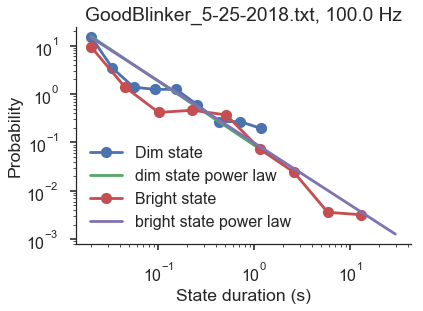

Bright state: Power law (from CDF):
Coefficient C_bright = 0.0981059152136 ± 0.00239658968057
logarithmic slope m_bright = 1.28188406993 ± 0.0144009557272
Dim state: Power law (from CDF):
Coefficient C_dim = 0.087727201815 ± 0.00200849859241
logarithmic slope m_dim = 1.32348887129 ± 0.0187018285419


In [15]:
# Save figures

# mpl.rcParams['figure.dpi'] = 200

font = {'size'   : 22}
plt.rc('font', **font)

# display off blinks
fig,ax1 = plt.subplots()
ax1.loglog(offbins,offprobs,'o-', label="Dim state")
plt.xlabel('Dim state duration (s)')
plt.ylabel('Probability')
ax1.loglog(offfitx,offfitpow_fromCDF, label="dim state power law")

#ploteveryfig(fig,ax1,today + ',' + filename+',offblinks' + infostr,offfitx,offfitpow_fromCDF, save=True)

# On blinks
#fig,ax1 = plt.subplots()
ax1.loglog(onbins,onprobs,'o-', label="Bright state")
plt.xlabel('State duration (s)')
plt.ylabel('Probability')
plt.title(filename)
sns.despine()
ax1.loglog(onfitx,onfitpow_fromCDF, label="bright state power law")
legend()
#ploteveryfig(fig,ax1,today + ',' + filename+',onblinks' + infostr,onfitx,onfitpow_fromCDF, save=True)


print os.getcwd()
savename = today + ',' + filename + ',powfitfromCDF,loglog'
print savename
savefig(savename + '.pdf', bbox_inches='tight', dpi=200)
savefig(savename + '.png', bbox_inches='tight', dpi=200)
plt.show()

print 'Bright state: Power law (from CDF):'
print  'Coefficient C_bright = ' + str(onparampow_fromCDF[0]) + ' ± ' + str(np.sqrt(onpcovpow_fromCDF[0,0]))
print 'logarithmic slope m_bright = ' + str(onparampow_fromCDF[1]) + ' ± ' + str(np.sqrt(onpcovpow_fromCDF[1,1]))

print 'Dim state: Power law (from CDF):'
print  'Coefficient C_dim = ' + str(offparampow_fromCDF[0]) + ' ± ' + str(np.sqrt(offpcovpow_fromCDF[0,0]))
print 'logarithmic slope m_dim = ' + str(offparampow_fromCDF[1]) + ' ± ' + str(np.sqrt(offpcovpow_fromCDF[1,1]))

In [12]:
print 'Exp [A, tau]'
print offparamexp
print onparamexp

print 'Pow [C, m]'
print offparampow
print onparampow

print 'Pow,CDF [C, m]'
print offparampow_fromCDF
print onparampow_fromCDF

Exp [A, tau]
[  1.28149292e+02   9.39423437e-03]
[  4.32624449e+01   1.31303199e-02]
Pow [C, m]
[  4.69026177e-04   2.65442277e+00]
[  1.29556031e-03   2.27207987e+00]
Pow,CDF [C, m]
[ 0.0877272   1.32348887]
[ 0.09810592  1.28188407]
